## Determine Groups
This notebook is aimed at creating groups from our data in a data-drive way. Several methods will be experimented with till we find one that fits our data best.

In [11]:
# load the data in and check min, max, and counts
from pandas import DataFrame, Series, read_csv

#project_home = '/home/camachocm2/Analysis/EmoGrow/temperament/'
project_home = '/home/camachocm2/Analysis/aggregate_anats/'
data_dir = project_home + 'cleaned_data/'
results_dir = project_home + 'results/'

### Preprocess the temperament data
This cell standardizes the CBQ scales (i.e. convert to standard units)

In [12]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

data_file = data_dir + 'subject_data_20190311.csv'
data = read_csv(data_file)
cbq_data= data.iloc[:,1:14]

std = StandardScaler()
std.fit(cbq_data)
std_cbq = std.fit_transform(cbq_data)
labels = []
for a in cbq_data.columns:
    labels.append(a + '_std')
std_cbq_data = DataFrame(data=std_cbq,columns=labels)
std_cbq_data.describe()

,activity_level_std,anger_frustration_std,attention_focusing_std,discomfort_std,soothability_std,fear_std,high_intensity_pleasure_std,impulsivity_std,inhibitory_control_std,low_intensity_pleasure_std,perceptual_sensitivity_std,sadness_std,shyness_std
count,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,171.000000,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02
mean,-1.142686e-16,-6.232831e-17,1.662088e-16,-1.921790e-16,0.000000,-1.973730e-16,-3.739699e-16,8.518202e-16,4.155221e-17,4.155221e-17,-1.454327e-16,-5.817309e-16,-1.038805e-17
std,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00
min,-2.551811e+00,-2.120929e+00,-3.231231e+00,-2.593282e+00,-2.861508,-2.297023e+00,-2.788227e+00,-2.536321e+00,-3.061245e+00,-4.266526e+00,-3.655530e+00,-2.832785e+00,-2.170726e+00
25%,-6.557224e-01,-7.077566e-01,-6.433404e-01,-7.603928e-01,-0.804056,-7.192762e-01,-6.546588e-01,-6.865041e-01,-6.624002e-01,-4.742632e-01,-6.037209e-01,-7.405220e-01,-7.371899e-01
50%,7.354250e-02,-8.596058e-02,7.551796e-02,4.609950e-02,0.077709,6.959721e-02,5.653070e-02,5.342255e-02,-6.268610e-02,2.010712e-01,1.675423e-01,6.714708e-03,1.229320e-01
75%,7.298809e-01,7.619431e-01,7.943763e-01,6.326287e-01,0.812513,7.269917e-01,7.677202e-01,7.677364e-01,6.869498e-01,7.205593e-01,6.662039e-01,6.792278e-01,6.963466e-01
max,2.115484e+00,1.949008e+00,1.944550e+00,2.538849e+00,2.135160,2.567696e+00,1.905623e+00,2.643166e+00,2.036300e+00,1.343945e+00,1.829748e+00,2.547320e+00,2.416590e+00


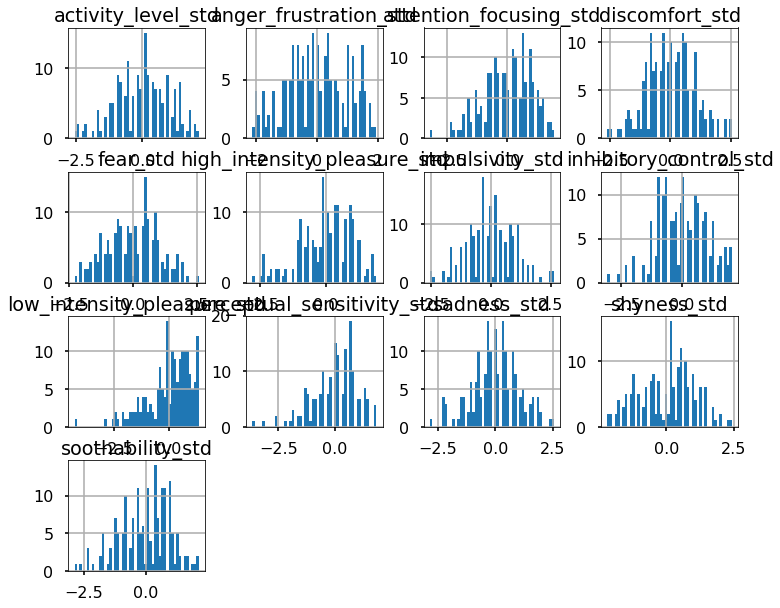

In [13]:
import matplotlib.pyplot as plt

std_cbq_data.hist(bins=50, figsize=(12,10))
plt.show()

In [14]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.analyze(std_cbq_data,4,rotation='varimax', method='ml', normalize=False)

print(fa.get_factor_variance())
factor_scores = fa.get_scores(std_cbq_data)
loads = fa.loadings
std_cbq_data = std_cbq_data.join(factor_scores)
all_data = data.join(std_cbq_data)
all_data.to_csv(data_dir + 'stadardized_data_20190311.csv')

                 Factor1   Factor2   Factor3   Factor4
SS Loadings     2.574488  1.617065  2.142523  0.701722
Proportion Var  0.198038  0.124390  0.164809  0.053979
Cumulative Var  0.198038  0.322427  0.487237  0.541215


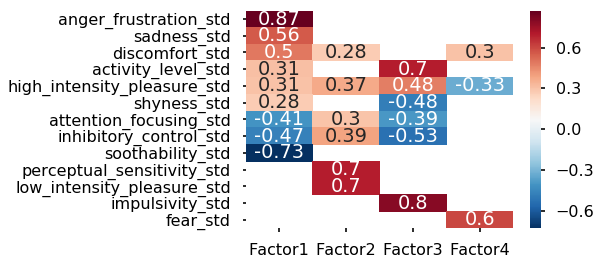

In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
mask_upper = fa.loadings
mask_upper = mask_upper[mask_upper>.25]
mask_lower = fa.loadings
mask_lower = mask_lower[mask_lower<-0.25]
mask = mask_upper.radd(mask_lower, fill_value=0)
mask = mask.sort_values(by=['Factor1','Factor2','Factor3','Factor4'], ascending=False)
sns.heatmap(mask, annot=True, cmap='RdBu_r')
plt.savefig(results_dir + 'loadings.svg')

# Combine the Data Together

In [16]:
from pandas import merge, read_csv

raw_data = read_csv(data_dir + 'aseg_data_20190311-151440.csv', index_col=0)
usability_key = read_csv(data_dir + 'usability_20190311.csv', index_col=None)
cbq_data = read_csv(data_dir + 'stadardized_data_20190311.csv', index_col=0)
subject_info = read_csv(data_dir + 'subject_info_20190311.csv', index_col=None)

clean_data=DataFrame()
clean_data['freesurferID']=raw_data['SubjectID']
clean_data['eTIV']=raw_data['eTIV']

for region in ['Putamen','Pallidum','Caudate','Accumbens-area']:
    clean_data['Left-'+region] = raw_data['Left-'+region][usability_key['Left-'+region]==1]
    clean_data['Right-'+region] = raw_data['Right-'+region][usability_key['Right-'+region]==1]

merged_data = clean_data.merge(cbq_data, on='freesurferID')
merged_data = merged_data.merge(subject_info, on='freesurferID')

for region in ['Putamen','Pallidum','Caudate','Accumbens-area']:
    merged_data['tot'+region] = merged_data['Left-'+region] + merged_data['Right-'+region] #raw units
    merged_data['tot'+region+'_std'] = (merged_data['tot'+region] - merged_data['tot'+region].mean())/merged_data['tot'+region].std(ddof=0) #standard units

for measure in ['CBCL_internalizing','CBCL_externalizing']:
    merged_data[measure+'_std'] = (merged_data[measure] - merged_data[measure].mean())/merged_data[measure].std(ddof=0) #standard units

merged_data.to_csv(results_dir + 'combined_data_20190311.csv')
merged_data.columns

Index(['freesurferID', 'eTIV', 'Left-Putamen', 'Right-Putamen',
       'Left-Pallidum', 'Right-Pallidum', 'Left-Caudate', 'Right-Caudate',
       'Left-Accumbens-area', 'Right-Accumbens-area', 'activity_level',
       'anger_frustration', 'attention_focusing', 'discomfort', 'soothability',
       'fear', 'high_intensity_pleasure', 'impulsivity', 'inhibitory_control',
       'low_intensity_pleasure', 'perceptual_sensitivity', 'sadness',
       'shyness', 'MAP_Temper_Loss', 'MAP_Noncompliance',
       'MAP_General_Aggression', 'MAP_Low_Concern', 'CBCL_internalizing',
       'CBCL_externalizing', 'activity_level_std', 'anger_frustration_std',
       'attention_focusing_std', 'discomfort_std', 'soothability_std',
       'fear_std', 'high_intensity_pleasure_std', 'impulsivity_std',
       'inhibitory_control_std', 'low_intensity_pleasure_std',
       'perceptual_sensitivity_std', 'sadness_std', 'shyness_std', 'Factor1',
       'Factor2', 'Factor3', 'Factor4', 'Study', 'Sequence Version',
  

In [17]:
results_dir = '/home/camachocm2/Analysis/aggregate_anats/results/'

data = read_csv(results_dir + 'residual_complete_data.csv', index_col=0)
data.columns

Index(['X', 'freesurferID', 'eTIV', 'Left.Putamen', 'Right.Putamen',
       'Left.Pallidum', 'Right.Pallidum', 'Left.Caudate', 'Right.Caudate',
       'Left.Accumbens.area', 'Right.Accumbens.area', 'activity_level',
       'anger_frustration', 'attention_focusing', 'discomfort', 'soothability',
       'fear', 'high_intensity_pleasure', 'impulsivity', 'inhibitory_control',
       'low_intensity_pleasure', 'perceptual_sensitivity', 'sadness',
       'shyness', 'MAP_Temper_Loss', 'MAP_Noncompliance',
       'MAP_General_Aggression', 'MAP_Low_Concern', 'CBCL_internalizing',
       'CBCL_externalizing', 'activity_level_std', 'anger_frustration_std',
       'attention_focusing_std', 'discomfort_std', 'soothability_std',
       'fear_std', 'high_intensity_pleasure_std', 'impulsivity_std',
       'inhibitory_control_std', 'low_intensity_pleasure_std',
       'perceptual_sensitivity_std', 'sadness_std', 'shyness_std', 'Factor1',
       'Factor2', 'Factor3', 'Factor4', 'Study', 'Sequence.Version

# Plot results

In [1]:
import matplotlib
from pandas import read_csv,DataFrame, Series, melt
import seaborn as sns
import matplotlib.pyplot as plt

results_dir = '/home/camachocm2/Analysis/aggregate_anats/results/'

data = read_csv(results_dir + 'residual_complete_data.csv', index_col=0)
data_long = melt(data, id_vars=['freesurferID', 'eTIV', 'Left.Putamen', 'Right.Putamen',
                                'Left.Pallidum', 'Right.Pallidum', 'Left.Caudate', 'Right.Caudate',
                                'Left.Accumbens.area', 'Right.Accumbens.area', 'activity_level',
                                'anger_frustration', 'attention_focusing', 'discomfort', 'soothability',
                                'fear', 'high_intensity_pleasure', 'impulsivity', 'inhibitory_control',
                                'low_intensity_pleasure', 'perceptual_sensitivity', 'sadness',
                                'shyness', 'MAP_Temper_Loss', 'MAP_Noncompliance',
                                'MAP_General_Aggression', 'MAP_Low_Concern', 'CBCL_internalizing',
                                'CBCL_externalizing', 'activity_level_std', 'anger_frustration_std',
                                'attention_focusing_std', 'discomfort_std', 'soothability_std',
                                'fear_std', 'high_intensity_pleasure_std', 'impulsivity_std',
                                'inhibitory_control_std', 'low_intensity_pleasure_std',
                                'perceptual_sensitivity_std', 'sadness_std', 'shyness_std', 
                                'Study', 'Sequence.Version','CT_QC',
                                'Dx_Group', 'Age_yrs', 'Age_mos', 'male', 'totPutamen',
                                'totPutamen_std', 'totPallidum', 'totPallidum_std', 'totCaudate',
                                'totCaudate_std', 'totAccumbens.area', 'totAccumbens.area_std',
                                'CBCL_internalizing_std', 'CBCL_externalizing_std', 'res_putamen',
                                'res_pall', 'res_caud', 'res_nacc'], 
                 value_vars=['Factor1', 'Factor2', 'Factor3','Factor4'], var_name='Factor',value_name='score')

sns.set_context('poster')
# Visualize results

#plt.figure(figsize=(16,18))
sns.jointplot(x='Factor1', y='res_putamen',data=data, kind='reg',color='brown')

#plt.savefig(results_dir + 'putamen_irritability_reg.svg',transparent=True)
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 600x600 with 3 Axes>

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


,X,eTIV,Left.Putamen,Right.Putamen,Left.Pallidum,Right.Pallidum,Left.Caudate,Right.Caudate,Left.Accumbens.area,Right.Accumbens.area,...,totCaudate,totCaudate_std,totAccumbens.area,totAccumbens.area_std,CBCL_internalizing_std,CBCL_externalizing_std,res_putamen,res_pall,res_caud,res_nacc
count,70.00000,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.000000,70.00000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,108.30000,1.463743e+06,5052.420000,5129.517143,1955.760000,1864.387143,3799.607143,3926.51000,554.778571,590.235714,...,7726.117143,-0.039740,1145.014286,-0.165735,-0.196067,-0.278851,-0.048894,-0.025051,0.026742,0.036675
std,46.82448,1.541640e+05,632.207909,607.049540,217.276019,226.464735,514.567431,565.04498,119.828204,95.485906,...,1062.411890,1.022649,206.568271,0.979951,0.897737,0.698806,0.595248,0.596634,0.708446,0.706113
min,1.00000,1.142335e+06,3766.100000,3747.700000,1520.600000,1408.900000,2664.300000,2726.10000,376.900000,434.600000,...,5390.400000,-2.288039,849.100000,-1.569539,-1.661238,-1.517546,-1.335736,-0.939254,-1.401401,-1.358056
25%,81.75000,1.352373e+06,4610.900000,4757.925000,1783.775000,1709.900000,3469.325000,3532.87500,462.475000,544.125000,...,7054.525000,-0.686196,991.500000,-0.894000,-0.803833,-0.670920,-0.477479,-0.480997,-0.366229,-0.455541
50%,110.50000,1.480785e+06,5038.350000,5145.250000,1948.150000,1854.100000,3771.550000,3883.45000,538.150000,570.150000,...,7578.600000,-0.181736,1118.550000,-0.291280,-0.354716,-0.388711,0.007135,-0.101084,-0.025483,-0.040819
75%,149.75000,1.567567e+06,5378.575000,5471.175000,2106.825000,1996.325000,4044.650000,4242.02500,614.375000,637.200000,...,8208.475000,0.424565,1256.850000,0.364809,0.441445,0.105154,0.274624,0.396553,0.343383,0.418822
max,168.00000,1.943317e+06,6961.200000,6926.400000,2551.400000,2415.800000,5236.000000,5360.70000,955.000000,894.100000,...,10596.700000,2.723407,1849.100000,3.174417,2.176669,1.727854,1.046401,1.409974,1.770660,1.982599


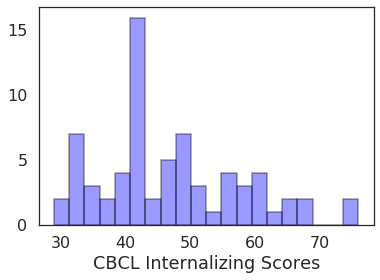

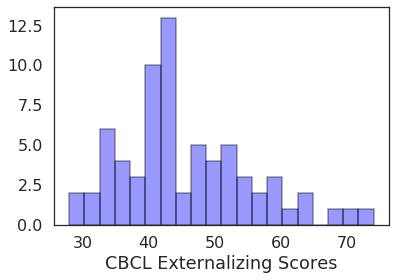

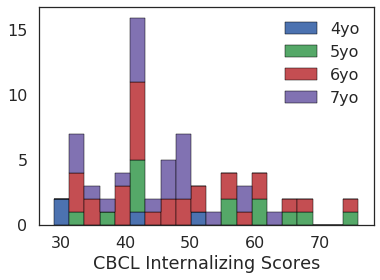

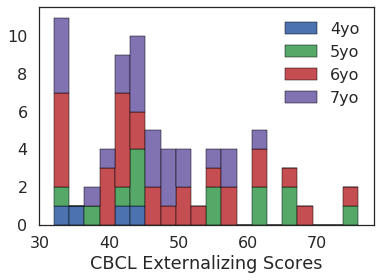

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context='poster', style='white')

use = data[data['CBCL_internalizing']>=0]
use = use[use['Age_yrs']<8]
use = use[use['Dx_Group']!='CLN']
age4 = use[use['Age_yrs']<5]
age5 = use[use['Age_yrs']>=5] 
age5 = age5[age5['Age_yrs']<6]
age6 = use[use['Age_yrs']>=6]
age6 = age6[age6['Age_yrs']<7]
age7 = use[use['Age_yrs']>7]



sns.distplot(a=use['CBCL_internalizing'],bins=20,kde=False,hist_kws={'color':'blue', 'edgecolor':'black','linewidth':1.5})
plt.xlabel('CBCL Internalizing Scores')
#plt.savefig('/home/camachocm2/Analysis/aggregate_anats/results/internalizingfig.svg')
plt.figure()
sns.distplot(a=use['CBCL_externalizing'],bins=20,kde=False,hist_kws={'color':'blue', 'edgecolor':'black', 'linewidth':1.5})
plt.xlabel('CBCL Externalizing Scores')
#plt.savefig('/home/camachocm2/Analysis/aggregate_anats/results/externalizingfig.svg')
plt.figure()
plt.hist([age4['CBCL_internalizing'],age5['CBCL_internalizing'],age6['CBCL_internalizing'],age7['CBCL_internalizing']], 
          bins=20, stacked=True, label=['4yo','5yo','6yo','7yo'], edgecolor='black')
plt.legend()
plt.xlabel('CBCL Internalizing Scores')
plt.savefig('/home/camachocm2/Analysis/aggregate_anats/results/internalizingfig.svg')

plt.figure()
plt.hist([age4['CBCL_externalizing'],age5['CBCL_internalizing'],age6['CBCL_internalizing'],age7['CBCL_internalizing']], 
          bins=20, stacked=True, label=['4yo','5yo','6yo','7yo'], edgecolor='black')
plt.legend()
plt.xlabel('CBCL Externalizing Scores')
plt.savefig('/home/camachocm2/Analysis/aggregate_anats/results/externalizingfig.svg')
use.describe()

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


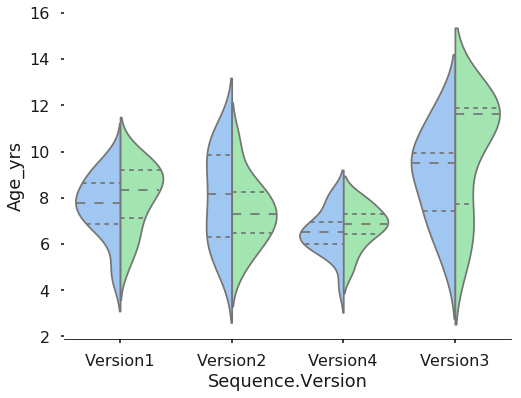

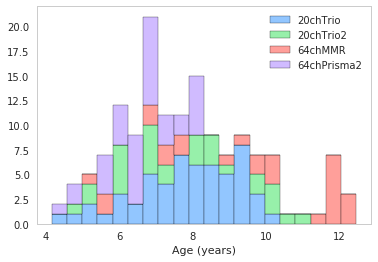

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('poster')

fig, ax = plt.subplots(figsize=(8,6))
sns.set(style='whitegrid',  palette='pastel', color_codes=True)
sns.violinplot(x='Sequence.Version', y='Age_yrs', hue='male', data=data, split=True,inner='quart')
sns.despine(left=True)
ax.legend_.remove()
plt.savefig(results_dir + 'age_sex_sample.png')

seq1 = data[data['Sequence.Version']=='Version1']
seq2 = data[data['Sequence.Version']=='Version2']
seq3 = data[data['Sequence.Version']=='Version3']
seq4 = data[data['Sequence.Version']=='Version4']

plt.figure(figsize=(6,4))
plt.rc('font', size=24)
plt.hist([seq1['Age_yrs'],seq2['Age_yrs'],seq3['Age_yrs'],seq4['Age_yrs']], 
         bins=20, stacked=True, edgecolor='black', 
         label=['20chTrio','20chTrio2','64chMMR','64chPrisma2'])
plt.legend()
plt.grid(False)
plt.xlabel('Age (years)')
plt.savefig(results_dir + 'age_histogram_by_sequence.svg')
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

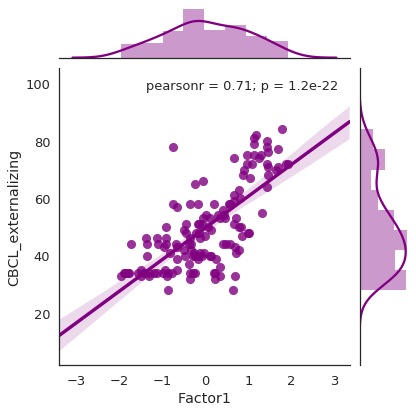

<Figure size 432x288 with 0 Axes>

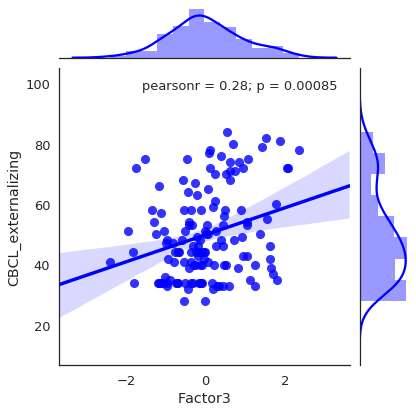

In [9]:
#sns.jointplot('Factor1','CBCL_internalizing',data=data, kind='reg')
sns.set(context='talk', style='white')
plt.figure()
sns.jointplot('Factor1','CBCL_externalizing',data=data, kind='reg', color='purple')
plt.savefig(results_dir + 'externalizingbyfactor1.svg')

plt.figure()
sns.jointplot('Factor3','CBCL_externalizing',data=data, kind='reg', color='blue')
plt.savefig(results_dir + 'externalizingbyfactor3.svg')